показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). Подробнее в материалах лекции.
Построить графики зависимости FPR от длинны строк L и простого модуля p.
Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000)
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.

In [3]:
import numpy as np
from collections import defaultdict
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
def poly_hash(s, p, x=31):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

In [6]:
def hash_int(x, a=112, b=22, p=997):
    return (a*x + b) % 997

In [7]:
def get_str(l):
    letters = list(string.ascii_lowercase)
    s = ''.join([random.choice(letters) for i in range(l)])
    return s

In [4]:
L = np.linspace(10, 100, 11)
ps = list(range(100, 1000, 97))

In [11]:
# считаем число коллизий

number_colls = dict()

for p in ps:
    ls = dict()
    for l in L:
        colls = list()
        for _ in range(10):
            strings = [get_str(int(l)) for k in range(100)]
            hashs = set(hash_int(poly_hash(s, p)) for s in strings)
            colls.append(100 - len(hashs))            
        ls[l] = colls
        
    number_colls[p] = ls

In [26]:
means_p = list()
std_p = list()

for p in number_colls:
    fpr = list()
    for l in L:
        for el in number_colls[p][l]:      
            fpr.append(el * 2 / 9900)
    means_p.append(np.mean(fpr))
    std_p.append(np.std(fpr))

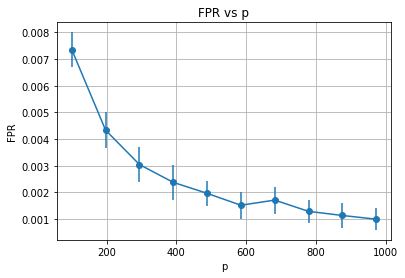

In [14]:
plt.errorbar(ps, means_p, std_p, marker='o')
plt.grid(True)
plt.xlabel('p')
plt.ylabel('FPR')
plt.title('FPR vs p')
plt.show()

In [20]:
means_l = list()
std_l = list()

for l in L:
    for p in number_colls:
        fpr = list()
        for el in number_colls[p][l]:      
            fpr.append(el * 2 / 9900)
    means_l.append(np.mean(fpr))
    std_l.append(np.std(fpr))

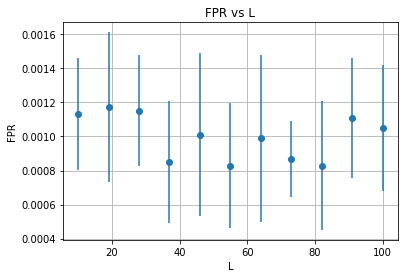

In [25]:
plt.errorbar(L, means_l, std_l, linestyle='None', marker='o')
plt.grid(True)
plt.xlabel('L')
plt.ylabel('FPR')
plt.title('FPR vs L')
plt.show()